# **connecting with google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=791a6a2b9caba8fa310b491df2578e351f363721f5d04bf05f76fd70001d48c1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


# **reading the image**

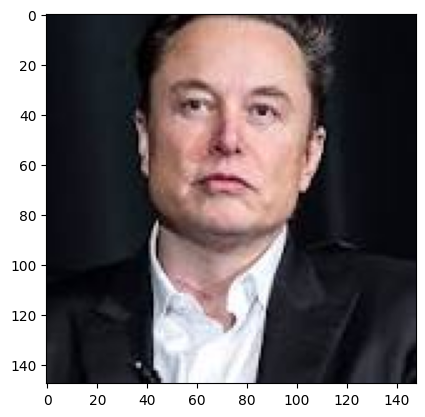

In [5]:
import cv2
import matplotlib.pyplot as plt #for ploting of image
from skimage.feature import hog # for extraction HOG features of image.
from skimage import data, exposure



# Read the image
image = cv2.imread('/content/drive/MyDrive/project/face-project/elon.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image)
plt.show()


# **visualizing HOG features**

<ipython-input-6-92111fc163ba>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),


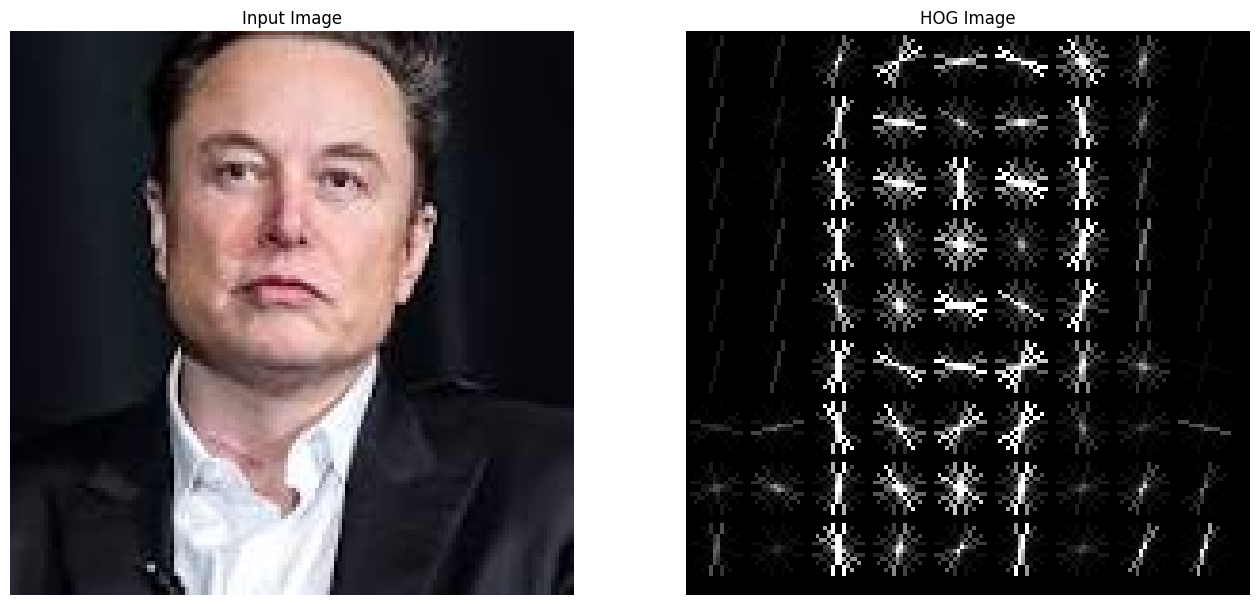

In [6]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                   cells_per_block=(1,1), visualize=True, multichannel=True)
# fd is feature discriptor which is used for representation of image
# hog_image is a HOG image extracted from input image

# now let's plot input image and hog image both so it's easy to compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), sharex = True, sharey = True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_rescaled_img = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_rescaled_img, cmap=plt.cm.gray)
ax2.set_title('HOG Image')
plt.show()

# **detection of face/faces**

In [7]:
import face_recognition  # For Face Detection
from matplotlib.patches import Rectangle # To draw rectangles
import numpy as np # for mathematicle operations

# In Face Recognition library there is a function face_locations which detects the all faces in the image and
# returns there locations
# let's use the function and detect the faces
face_locations =face_recognition.face_locations (image)

total_faces = len(face_locations)
# lets print out the number of faces in the image.
print('There are {} face(s) in the image'.format(total_faces))

There are 1 face(s) in the image


# **face encoding and detection**

Face encoded successfully.


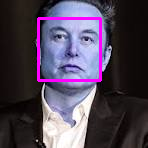

Face(s) found at locations: [(18, 100, 80, 38)]


In [13]:


# Load the image from file
image_path = '/content/drive/MyDrive/project/face-project/elon.jpeg'
image = face_recognition.load_image_file(image_path)

# Encode the face in the image
encodings = face_recognition.face_encodings(image)
face_locations = face_recognition.face_locations(image)
test_face_locations = face_recognition.face_locations(image)

# Check if any face is detected and encoded
if len(encodings) > 0:
    encodeElon = encodings[0]  # Assuming you're interested in the first detected face
    print("Face encoded successfully.")
else:
    print("No faces found in the image.")
    cv2.rectangle(image, (faceLoc[3], faceLoc[0]), (faceLoc[1], faceLoc[2]), (255, 0, 255), 2)

if len(face_locations) > 0:
    # Assuming you're interested in the first detected face
    faceLoc = face_locations[0]

    # Draw a rectangle around the detected face
    cv2.rectangle(image, (faceLoc[3], faceLoc[0]), (faceLoc[1], faceLoc[2]), (255, 0, 255), 2)

    # Display the image with the rectangle
    cv2_imshow(image)
else:
    print("No faces found in the image.")

if len(face_locations) > 0:
    print("Face(s) found at locations:", face_locations)
else:
    print("No faces found in the image.")




Face encoded successfully.


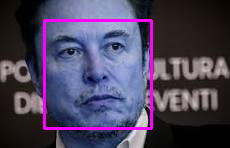

In [14]:
# Load the image from file
from google.colab.patches import cv2_imshow
import cv2
image_path = '/content/drive/MyDrive/project/face-project/elon3.jpeg'
image = cv2.imread(image_path)
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

# Encode the face in the image
encodings = face_recognition.face_encodings(image)

# Check if any face is detected and encoded
if len(encodings) > 0:
    encodeTest = encodings[0] # Assuming you're interested in the first detected face
    print("Face encoded successfully.")
else:
    print("No faces found in the image.")

# Ensure that at least one face is detected
if len(face_locations) > 0:
    # Assuming you're interested in the first detected face
    faceLocTest = face_locations[0]

    # Draw a rectangle around the detected face
    cv2.rectangle(image, (faceLocTest[3], faceLocTest[0]), (faceLocTest[1], faceLocTest[2]), (255, 0, 255), 2)

    # Display the image with the rectangle
    cv2_imshow(image)
else:
    print("No faces found in the image.")



# **face recognition and evaluation**

In [15]:


# Load the image of Elon Musk (known face)
image_path_elon = '/content/drive/MyDrive/project/face-project/elon.jpeg'
image_elon = face_recognition.load_image_file(image_path_elon)

# Load the image of the test face
image_path_test = '/content/drive/MyDrive/project/face-project/billgate.jpeg'
image_test = face_recognition.load_image_file(image_path_test)

# Get face encodings for Elon Musk
encodeElon = face_recognition.face_encodings(image_elon)[0]

# Get face encodings for the test face
encodeTest = face_recognition.face_encodings(image_test)[0]

# Compare the face encodings
results = face_recognition.compare_faces([encodeElon], encodeTest)

print("Results:", results)


Results: [False]


# **face recognition and verification**

In [16]:
# Load the image of Elon Musk (known face)
image_path_elon = '/content/drive/MyDrive/project/face-project/elon.jpeg'
image_elon = face_recognition.load_image_file(image_path_elon)

# Load the image of the test face
image_path_test = '/content/drive/MyDrive/project/face-project/eloon.jpeg'
image_test = face_recognition.load_image_file(image_path_test)

# Get face encodings for Elon Musk
encodeElon = face_recognition.face_encodings(image_elon)[0]

# Get face encodings for the test face
encodeTest = face_recognition.face_encodings(image_test)[0]
results = face_recognition.compare_faces([encodeElon], encodeTest)
print("Results:", results)

# Calculate the face distance between Elon Musk and the test face
faceDis = face_recognition.face_distance([encodeElon], encodeTest)

print("Face distance:", faceDis)


Results: [True]
Face distance: [0.33377353]


# **face recognition and analysis**

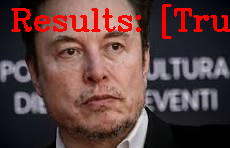

In [17]:
from google.colab.patches import cv2_imshow
import cv2
# import face_recognition

# Load the test image
imgTest = cv2.imread('/content/drive/MyDrive/project/face-project/elon3.jpeg')

# Check if imgTest is None
if imgTest is None:
    print("Error: Unable to load the test image.")
else:
    # Load the known face image and encode it
    image_path_elon = '/content/drive/MyDrive/project/face-project/elon.jpeg'
    image_elon = face_recognition.load_image_file(image_path_elon)
    encodeElon = face_recognition.face_encodings(image_elon)[0]

    # Load the test face image and encode it
    image_path_test = '/content/drive/MyDrive/project/face-project/elon3.jpeg'
    image_test = face_recognition.load_image_file(image_path_test)
    encodeTest = face_recognition.face_encodings(image_test)[0]

    # Compare the face encodings
    results = face_recognition.compare_faces([encodeElon], encodeTest)

    # Calculate the face distance
    faceDis = face_recognition.face_distance([encodeElon], encodeTest)

    # Put text on the image
    text = f'Results: {results}, Face Distance: {round(faceDis[0], 2)}'
    cv2.putText(imgTest, text, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

    # Display the image with text
    cv2_imshow(imgTest)


# **Attendence_projecttttt**

In [74]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
from PIL import ImageGrab

# **directory listing**

In [75]:
path = '/content/drive/MyDrive/project/face-project/images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)

['obama.jpeg', 'qasim.jpeg', 'elon2.jpeg', 'ayesha.jpg']


# **importing specific libraries**

In [81]:
!pip install opencv-python-headless
import cv2
from google.colab import output
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js



# **initializing webcam , face capturing and printing the class, marking time **

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow
import cv2
import os
import face_recognition
from datetime import datetime

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Function to load known faces from image folder
def load_known_faces(folder_path):
    known_faces = []
    for filename in os.listdir(folder_path):
        image = face_recognition.load_image_file(os.path.join(folder_path, filename))
        encoding = face_recognition.face_encodings(image)[0]  # Assuming only one face per image
        known_faces.append((filename, encoding))  # Store both filename and encoding
    return known_faces

# Take a photo
img_path = take_photo()
print('Saved to {}'.format(img_path))

# Read the image using OpenCV
img = cv2.imread(img_path)

# Load known faces from the image folder
known_faces_folder = '/content/drive/MyDrive/project/face-project/images'  # Change this to the path of your known faces folder
known_faces = load_known_faces(known_faces_folder)

# Convert the image to RGB (as face_recognition uses RGB images)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Find face locations and encodings in the image
face_locations = face_recognition.face_locations(img_rgb)
face_encodings = face_recognition.face_encodings(img_rgb, face_locations)

# Check if no faces were detected
if len(face_encodings) == 0:
    print("No faces found in the image.")
else:
    # Iterate through detected faces and compare with known faces
    for face_encoding, face_location in zip(face_encodings, face_locations):
        # Compare face encoding with known faces
        matches = face_recognition.compare_faces([kf[1] for kf in known_faces], face_encoding)

        # Check if any known face matches
        if any(matches):
            name = known_faces[matches.index(True)][0].split('.')[0]  # Get the filename (name) of the matched face
            print(f"The captured image matches with class: {name}")
            # Mark attendance
            with open('Attendance.csv', 'a') as f:
                now = datetime.now()
                dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
                f.write(f"{name},{dt_string}\n")
        else:
            print("No match found")

# Display the image using cv2_imshow for Google Colab
cv2_imshow(img)
